### work in progress :-)

In [46]:
from datasets.Torch_datasets import create_data_transforms_CIFAR10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [13]:
train_loader, val_loader, test_loader = create_data_transforms_CIFAR10(32, train=True)

100%|███████████████████████████████████████████████████████████████| 170498071/170498071 [00:21<00:00, 8046547.20it/s]


Extracting ./data/cifar10\cifar-10-python.tar.gz to ./data/cifar10
Files already downloaded and verified


In [66]:
# def print_shapes(data_loader, dataset_name):
#     for i, (inputs, labels) in enumerate(data_loader):
#         print(f"{dataset_name} - Batch {i}: inputs shape: {inputs.shape}, labels shape: {labels.shape}")

# print_shapes(train_loader, "Train")
# print_shapes(val_loader, "Validation")
# print_shapes(test_loader, "Test")

Train - Batch 0: inputs shape: torch.Size([32, 3, 32, 32]), labels shape: torch.Size([32])
Train - Batch 1: inputs shape: torch.Size([32, 3, 32, 32]), labels shape: torch.Size([32])
Train - Batch 2: inputs shape: torch.Size([32, 3, 32, 32]), labels shape: torch.Size([32])
Train - Batch 3: inputs shape: torch.Size([32, 3, 32, 32]), labels shape: torch.Size([32])
Train - Batch 4: inputs shape: torch.Size([32, 3, 32, 32]), labels shape: torch.Size([32])
Train - Batch 5: inputs shape: torch.Size([32, 3, 32, 32]), labels shape: torch.Size([32])
Train - Batch 6: inputs shape: torch.Size([32, 3, 32, 32]), labels shape: torch.Size([32])
Train - Batch 7: inputs shape: torch.Size([32, 3, 32, 32]), labels shape: torch.Size([32])
Train - Batch 8: inputs shape: torch.Size([32, 3, 32, 32]), labels shape: torch.Size([32])
Train - Batch 9: inputs shape: torch.Size([32, 3, 32, 32]), labels shape: torch.Size([32])
Train - Batch 10: inputs shape: torch.Size([32, 3, 32, 32]), labels shape: torch.Size([32]

In [98]:
X_Train = []
y_Train = []
for inputs, labels in train_loader:
    X_Train.append(inputs.numpy())
    y_Train.append(labels.numpy())
X_train = np.array(X_Train)
y_train = np.array(y_Train)
X_train = np.transpose(X_train, (0, 1, 3, 4, 2))
X_train = X_train.reshape(-1, 32*32*3)
y_train = y_train.reshape(-1)

In [99]:
print("Input Train shape : ", X_train.shape, "Output Train shape :", y_train.shape)

Input Train shape :  (40000, 3072) Output Train shape : (40000,)


In [105]:
X_Val = []
y_Val = []
for inputs, labels in val_loader:
    X_Val.append(inputs.numpy())
    y_Val.append(labels.numpy())
temp = X_Val[-1]
temp_ = y_Val[-1]
temp = np.array([temp])
temp_ = np.array([temp_])
temp = np.transpose(temp, (0, 1, 3, 4, 2))
temp = temp.reshape(-1, 32*32*3)
temp_ = temp_.reshape(-1)
X_val = np.array(X_Val[:-1])
y_val = np.array(y_Val[:-1])
X_val = np.transpose(X_val, (0, 1, 3, 4, 2))
X_val = X_val.reshape(-1, 32*32*3)
y_val = y_val.reshape(-1)
X_val = np.concatenate((X_val, temp), axis = 0)
y_val = np.concatenate((y_val, temp_), axis = 0)

In [106]:
X_val.shape, y_val.shape

((10000, 3072), (10000,))

In [107]:
X_Test = []
y_Test = []
for inputs, labels in test_loader:
    X_Test.append(inputs.numpy())
    y_Test.append(labels.numpy())
temp = X_Test[-1]
temp_ = y_Test[-1]
temp = np.array([temp])
temp_ = np.array([temp_])
temp = np.transpose(temp, (0, 1, 3, 4, 2))
temp = temp.reshape(-1, 32*32*3)
temp_ = temp_.reshape(-1)
X_test = np.array(X_Test[:-1])
y_test = np.array(y_Test[:-1])
X_test = np.transpose(X_test, (0, 1, 3, 4, 2))
X_test = X_test.reshape(-1, 32*32*3)
y_test = y_test.reshape(-1)
X_test = np.concatenate((X_test, temp), axis = 0)
y_test = np.concatenate((y_test, temp_), axis = 0)

In [108]:
X_test.shape, y_test.shape

((10000, 3072), (10000,))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

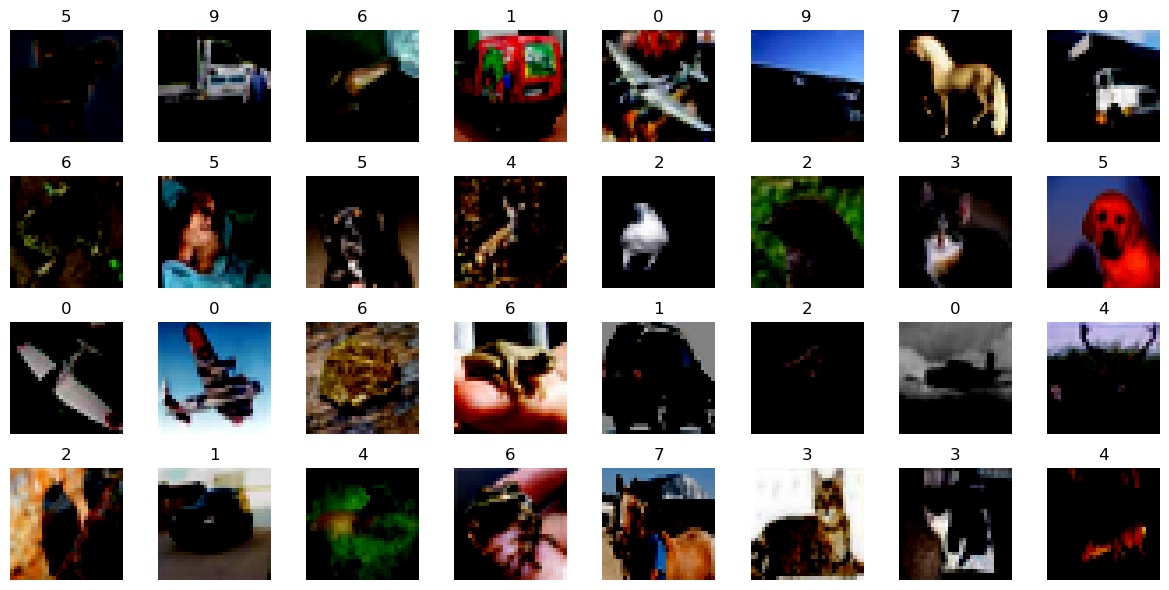

In [43]:
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i in range(X_train.shape[1]):
    row = i // 8
    col = i % 8
    ax = axes[row, col]
    ax.imshow(X_train[0][i])
    ax.set_title(y_train[0][i])
    ax.axis('off')  # Hide the axis

# Adjust spacing
plt.tight_layout()
plt.show()

In [140]:
rf_model = RandomForestClassifier(n_estimators=30, max_features=None, bootstrap=True, random_state=42, n_jobs=-1, verbose=10)

In [141]:
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 30
building tree 2 of 30
building tree 3 of 30
building tree 4 of 30
building tree 5 of 30
building tree 6 of 30
building tree 7 of 30
building tree 8 of 30
building tree 9 of 30
building tree 10 of 30


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  5.3min


building tree 11 of 30
building tree 12 of 30
building tree 13 of 30
building tree 14 of 30
building tree 15 of 30
building tree 16 of 30
building tree 17 of 30


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 10.3min


building tree 18 of 30
building tree 19 of 30
building tree 20 of 30
building tree 21 of 30
building tree 22 of 30
building tree 23 of 30
building tree 24 of 30
building tree 25 of 30
building tree 26 of 30
building tree 27 of 30


[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 15.8min remaining:  9.1min


building tree 28 of 30
building tree 29 of 30
building tree 30 of 30


[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 16.6min remaining:  5.1min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 19.4min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.7min finished


RandomForestClassifier(max_features=None, n_estimators=30, n_jobs=-1,
                       random_state=42, verbose=10)

In [168]:
def accuracy(y_test, X_test, rf_model):
    y_pred = rf_model.predict(X_test)
    correct_predictions = np.sum(y_pred == y_test)
    acc = correct_predictions / len(y_test)
    return acc
def accuracy_(y_test, y_pred):
    correct_predictions = np.sum(y_pred == y_test)
    acc = correct_predictions / len(y_test)
    return acc

In [142]:
print("Train accuracy : ",  accuracy(y_train, X_train, rf_model=rf_model))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.1s


Train accuracy :  0.999775


[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.3s finished


In [145]:
print("Test accuracy : ",  accuracy(y_test, X_test, rf_model=rf_model))

Test accuracy :  0.4192


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished


In [146]:
print("Val accuracy : ",  accuracy(y_val, X_val, rf_model=rf_model))

Val accuracy :  0.4239


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  19 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  23 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  27 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  30 out of  30 | elapsed:    0.0s finished


In [151]:
# import joblib
# joblib.dump(rf_model, 'random_forest_model.joblib')
# Load the model
# loaded_model = joblib.load('random_forest_model.joblib')

In [152]:
from deslib.des.des_knn import DESKNN
from deslib.des.knora_u import KNORAU
from deslib.des.probabilistic.rrc import RRC

In [153]:
param_grid = {
    'k': [7, 10, 15],  # Parameters for KNN
    'knn_classifier': ['knn', 'faiss'],
    'DSEL_perc': [0.5, 0.75, 1.0],  # Parameters for DESKNN
}

In [183]:
des_knn = DESKNN(rf_model, k=7, knn_classifier='knn', DSEL_perc=1.0)
knora_u = KNORAU(rf_model, k=7, knn_classifier='knn', DSEL_perc=1.0)
rrc = RRC(rf_model, k=7, knn_classifier='knn', DSEL_perc=1.0)

In [162]:
des_knn.fit(X_val, y_val)

DESKNN(DSEL_perc=1.0,
       pool_classifiers=RandomForestClassifier(max_features=None,
                                               n_estimators=30, n_jobs=-1,
                                               random_state=42, verbose=10))

In [180]:
y_pred = des_knn.predict(X_test[:100])

In [181]:
accuracy_(y_test[:100], y_pred)

0.43

In [184]:
knora_u.fit(X_val, y_val)

KNORAU(DSEL_perc=1.0,
       pool_classifiers=RandomForestClassifier(max_features=None,
                                               n_estimators=30, n_jobs=-1,
                                               random_state=42, verbose=10))

In [193]:
y_pred = knora_u.predict(X_test[:100])

In [194]:
accuracy_(y_test[:100], y_pred)

0.41

In [195]:
rrc.fit(X_val, y_val)

RRC(DSEL_perc=1.0, k=7,
    pool_classifiers=RandomForestClassifier(max_features=None, n_estimators=30,
                                            n_jobs=-1, random_state=42,
                                            verbose=10))

In [196]:
y_pred = rrc.predict(X_test[:100])

In [197]:
accuracy_(y_test[:100], y_pred)

0.39